In [ ]:
#PY PROJECT SANTANDER-stock news
#https://finviz.com/quote.ashx?t=SAN&ty=c&ta=1&p=d
#TOOLS:Python/Sentiment Analysis/Visualization

In [5]:
!pip install nltk

In [6]:
import nltk

In [12]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
!pip install matplotlib

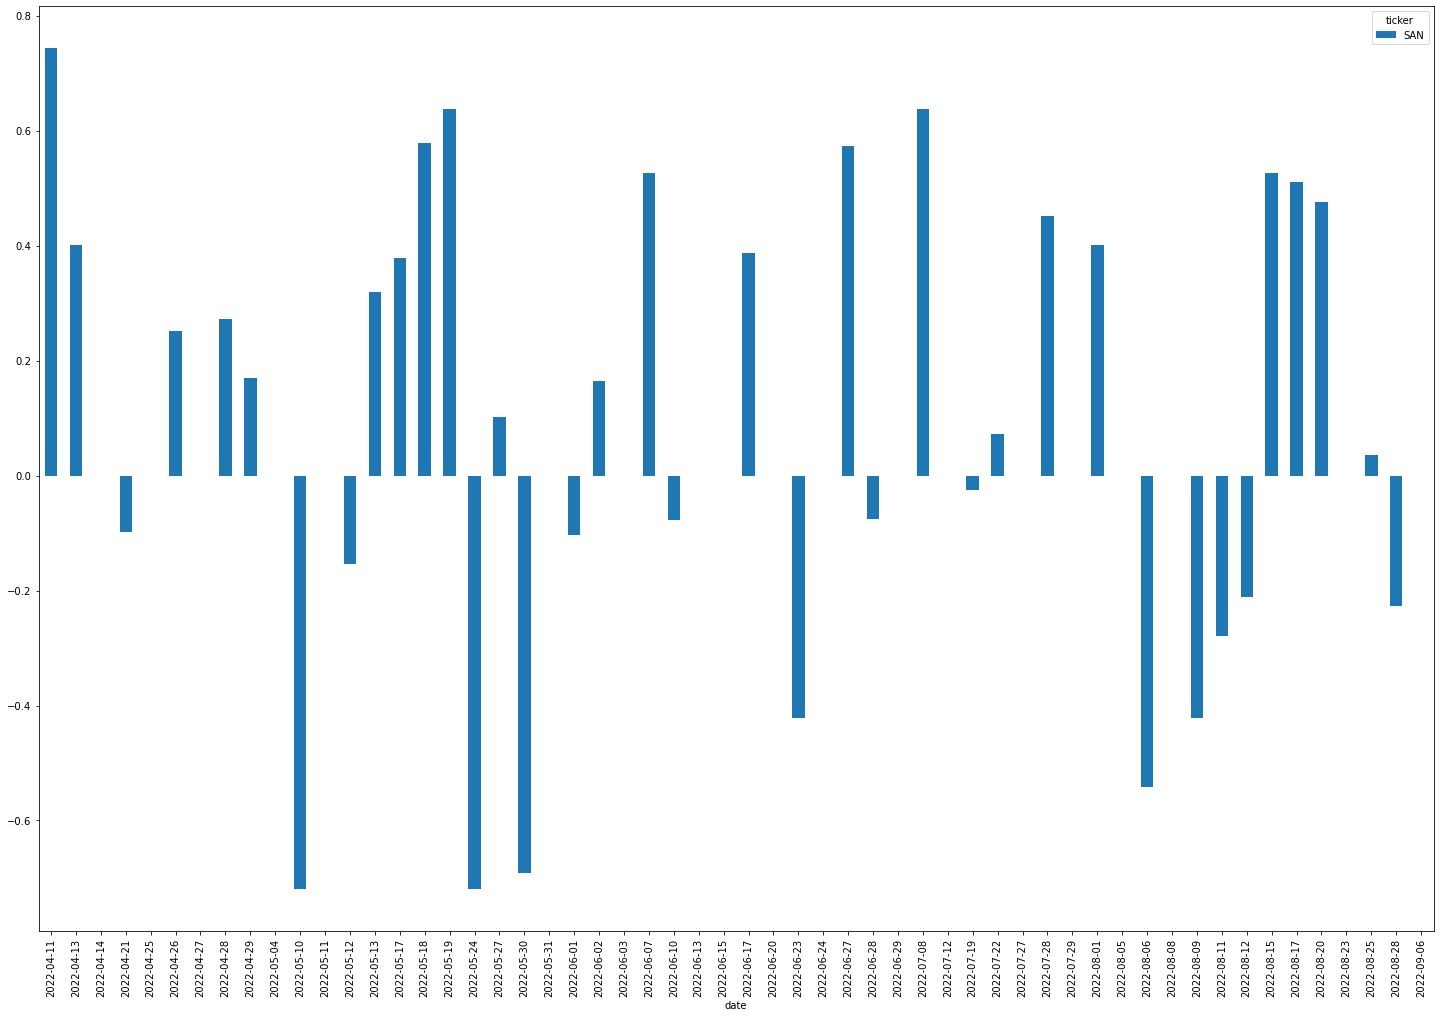

In [7]:
#PART1:parsing Finviz article data
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt


finviz_url='https://finviz.com/quote.ashx?t='
tickers=['SAN']
#tickers=['SAN','FB']
news_tables={}
for ticker in tickers:
    url=finviz_url+ticker
    
    req=Request(url=url, headers={'user-agent':'my-app'})
    response=urlopen(req)
    #1print(response)
    #<http.client.HTTPResponse object at 0x000001F0FECF2FA0>
    html= BeautifulSoup(response, 'html')
    news_table=html.find(id='news-table')
    news_tables[ticker]=news_table
    #2print(html)
    break

#3print(news_tables)
#PART2:manipulating Finviz data
#san_data=news_tables['SAN']
#san_rows=san_data.findAll('tr')
#4print(san_rows)
#for index, row in enumerate(san_rows):
 #   title=row.a.text
    #5print(title)
  #  timestamp=row.td.text
   # 6print(timestamp + " " + title)
   
parsed_data = []

for ticker, news_table in news_tables.items():
    
    for row in news_table.findAll('tr'):
        
        title=row.a.text
        date_data=row.td.text.split(' ')
        
        if len(date_data)==1:
            time=date_data[0]
        else:
            date=date_data[0]
            time=date_data[1]
        
        parsed_data.append([ticker, date, time, title])

 #7print(parsed_data)

#PART3:Applying sentiment analysis
#python3 -m pip install nltk

df=pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
#8print(df.head())
vader = SentimentIntensityAnalyzer()
#print(vader.polarity_scores("apple is bad"))
#9print(df['title'])
f=lambda title: vader.polarity_scores(title)['compound']

df['compound']=df['title'].apply(f)

#10print(df.head())

#PART4:Visualization of sentiment analysis
df['date']=pd.to_datetime(df.date).dt.date

#plt.figure(figsize=(10,8))

plt.rcParams['figure.figsize']=(25,17)
#sns.set(font_scale=1.3)
#ax=ns.countplot(x="DataBase",data=df)
#for p in ax.patches:
#    percentage='{}'.format(p.get_height())
 #   x=p.get_x()+p.get_width()
  #  y=p.get_height()
   # ax.annotate(percentage,(x-0.4,y+0.1),ha='center',fontsize=15)
#plt.tight_layout()
#plt.show()


mean_df = df.groupby(['ticker', 'date']).mean()
#print(mean_df)
mean_df=mean_df.unstack()
mean_df=mean_df.xs('compound', axis="columns").transpose()
#print(mean_df)
mean_df.plot(kind='bar')
plt.show()